In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
len(df)

11914

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [6]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
cat_cols = list(df.dtypes[df.dtypes == 'object'].index)

In [8]:
for _ in cat_cols:
    df[_] = df[_].str.lower().str.replace(" ","_")

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [10]:
target_col = 'msrp'

<AxesSubplot:xlabel='msrp', ylabel='Count'>

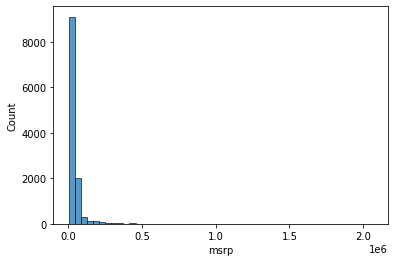

In [11]:
sns.histplot(df[target_col], bins = 50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

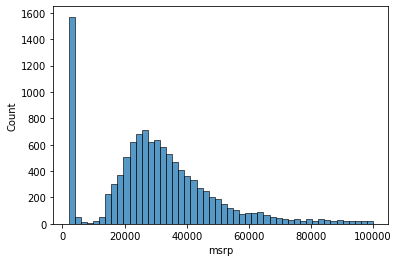

In [12]:
sns.histplot(df[target_col][df[target_col] < 100000], bins=50)

In [13]:
log_target = np.log1p(df[target_col])

<AxesSubplot:xlabel='msrp', ylabel='Count'>

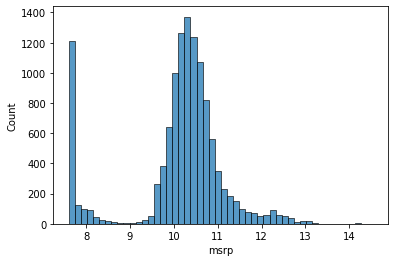

In [14]:
sns.histplot(log_target, bins=50)

In [15]:
(df.isnull().sum()/df.shape[0])*100

make                  0.000000
model                 0.000000
year                  0.000000
engine_fuel_type      0.025180
engine_hp             0.579151
engine_cylinders      0.251805
transmission_type     0.000000
driven_wheels         0.000000
number_of_doors       0.050361
market_category      31.408427
vehicle_size          0.000000
vehicle_style         0.000000
highway_mpg           0.000000
city_mpg              0.000000
popularity            0.000000
msrp                  0.000000
dtype: float64

## Splitting the data

In [16]:
n_rows = df.shape[0]
training = int(n_rows*0.6)
validation = int(n_rows*0.2)
testing = n_rows - training - validation
df_train = df.iloc[:training]
df_val = df.iloc[training:training+validation]
df_test = df.iloc[training+validation:]

In [17]:
df_train.shape[0], df_val.shape[0], df_test.shape[0]

(7148, 2382, 2384)

In [18]:
idx = np.arange(n_rows)
np.random.seed(42)
np.random.shuffle(idx)

In [19]:
df_train = df.iloc[idx[:training]]
df_val = df.iloc[idx[training:training+validation]]
df_test = df.iloc[idx[training+validation:]]

In [20]:
df.shape[0], df_train.shape[0] + df_val.shape[0] + df_test.shape[0]

(11914, 11914)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = np.log1p(df_train[target_col])
y_val = np.log1p(df_val[target_col])
y_test = np.log1p(df_test[target_col])

<AxesSubplot:xlabel='msrp', ylabel='Count'>

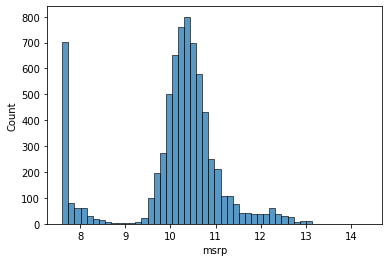

In [23]:
sns.histplot(y_train, bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

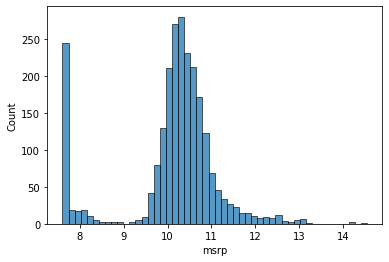

In [24]:
sns.histplot(y_val, bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

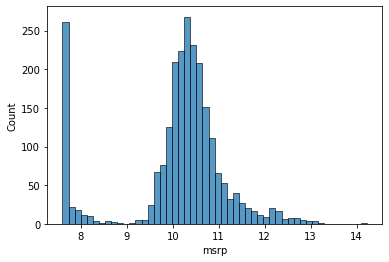

In [25]:
sns.histplot(y_test, bins=50)

In [26]:
df_train.drop([target_col], axis=1, inplace=True)
df_val.drop([target_col], axis=1, inplace=True)
df_test.drop([target_col], axis=1, inplace=True)

## Linear Regression

In [27]:
w0 = 1000
Xi = [200, 500, 5, 20]

def linear_reg(features: list=[], y: list=None):
    
    features = np.matrix(features)
    
    shape = features.shape
    rows, cols = shape[0], shape[1]
    preds = np.zeros((rows, cols))
    weights = np.matrix([500, 20, 10, 0.05])
    
    if y is None:
        y = preds
    else:
        y = np.matrix(y)
    
    assert y.shape == preds.shape
    assert weights.shape[1] == cols
        
    for i in range(rows):
        for j in range(cols):
            y[i,j] = weights[i,j]*features[i,j]
        
    return np.sum(y) + w0

In [28]:
linear_reg(features=Xi)

111051.0

In [29]:
w0 = 100
W = [20, 30, 40]
weights = np.matrix([w0] + W)
X = np.array([[100, 80, 60],[80,60, 40], [23,50,70]])
x0 = np.ones((X.shape[0],1))
x = np.hstack((x0, X))

In [30]:
def linear_regression(x, w):
    y = w*x.T
    return y

def linear_model(x, y):
    
    x0 = np.ones((x.shape[0],1))
    x = np.hstack((x0, x))
    
    features_transpose = x.T
    features_transpose_inv = np.linalg.inv(features_transpose.dot(x))
    weights = features_transpose_inv.dot(features_transpose).dot(y)
    
    return [weights[0], weights[1:]]

In [31]:
linear_regression(x, weights)

matrix([[6900., 5100., 4860.]])

In [32]:
slope, coefficient = linear_model(X,np.array([6900, 5100, 4860]))
slope, coefficient

(541.69921875, array([20.12695312, 19.16015625, 58.45458984]))

## Baseline Solution

In [33]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base]

In [34]:
X_train.isnull().sum()

engine_hp           52
engine_cylinders    16
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [35]:
X_train.fillna(value=X_train.mean(), inplace=True)

/Users/bajajn/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4460: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [36]:
X = X_train.values
y = y_train.values

slope, coefficient = linear_model(X,y)

In [37]:
preds = slope + X.dot(coefficient)

<AxesSubplot:ylabel='Count'>

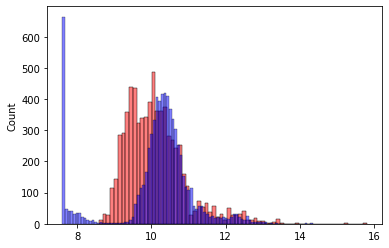

In [38]:
sns.histplot(preds, alpha=0.5, color='red')
sns.histplot(y, alpha=0.5, color='blue')

# RMSE

In [39]:
def rmse(y, preds):
    se = (y - preds)**2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return mse

In [40]:
rmse(y_train, preds)

0.5698795952473726

## Validation Set

In [41]:
X_val = df_val[base]
X_val.fillna(value=X_train.mean(), inplace=True)
X_validation = X_val.values
y_validation = y_val.values
preds_val = slope + X_validation.dot(coefficient)

rmse(y_validation, preds_val)

/Users/bajajn/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4460: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


0.5461400989303825

In [42]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df['year']
    base_features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age']
    X = df[base_features]
    return X

X_train = prepare_X(df_train)
X_train = X_train.fillna(value=X_train.mean())

X_val = prepare_X(df_val)
X_val = X_val.fillna(value=X_train.mean())

X = X_train.values
y = y_train.values

slope, coefficient = linear_model(X,y)
y_pred = slope + X.dot(coefficient)
    

<AxesSubplot:ylabel='Count'>

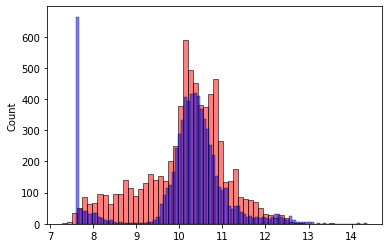

In [43]:
sns.histplot(y_pred, alpha=0.5, color='red')
sns.histplot(y, alpha=0.5, color='blue')

In [44]:
rmse(y, y_pred)

0.2608299264232249

In [45]:
X = X_val.values
y = y_val.values

y_pred = slope + X.dot(coefficient)
rmse(y, y_pred)

0.25834737652333856

<AxesSubplot:ylabel='Count'>

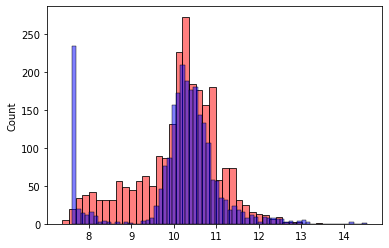

In [46]:
sns.histplot(y_pred, alpha=0.5, color='red')
sns.histplot(y, alpha=0.5, color='blue')

## Add categorical variables

In [47]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [48]:
def prepare_X(df_subset):
    df_subset = df_subset.copy()
    
    df_subset['age'] = 2017 - df_subset['year']

    cat_cols = ['number_of_doors', 'make','engine_fuel_type',
                'transmission_type','driven_wheels','market_category',
                'vehicle_size','vehicle_style']

    num_features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 
                    'city_mpg', 'popularity', 'age']
    
    

    features = num_features.copy()

    for cols in cat_cols:
        if cols == 'number_of_doors':
            for val in [2,3,4]:
                df_subset['%s_%s' % (cols, val)] = (df_subset[cols] == val).astype('int')
                features.append('%s_%s' % (cols, val))
        
        else:
            top_5 = df[cols].value_counts().head().index.values
            for val in top_5:
                df_subset['%s_%s' % (cols, val)] = (df_subset[cols] == val).astype('int')
                features.append('%s_%s' % (cols, val))
    
    df_num = df_subset[features]
    df_num = df_num.fillna(value=df_num.mean())
    
    X = df_num.values
    
    return X
        

In [49]:

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [50]:
X_train

array([[275.,   6.,  18., ...,   0.,   0.,   0.],
       [170.,   4.,  38., ...,   0.,   0.,   0.],
       [248.,   6.,  28., ...,   0.,   0.,   0.],
       ...,
       [207.,   6.,  17., ...,   0.,   0.,   0.],
       [201.,   4.,  29., ...,   0.,   0.,   1.],
       [150.,   4.,  24., ...,   0.,   0.,   0.]])

In [51]:
X = X_train
y = y_train.values

slope, coefficient = linear_model(X,y)
y_pred = slope + X.dot(coefficient)

#TRaining score
print(rmse(y, y_pred))

X = X_val
y = y_val.values

y_pred = slope + X.dot(coefficient)


#Validation score
print(rmse(y, y_pred))

12818.573213402502
18479.170738201352


# Regularisation

In [52]:
def linear_model_reg(x, y, alpha=0.01):
    
    x0 = np.ones((x.shape[0],1))
    x = np.hstack((x0, x))
    
    features_transpose = x.T.dot(x)
    features_transpose = features_transpose + alpha*np.eye(features_transpose.shape[0])
    features_transpose_inv = np.linalg.inv(features_transpose)
    weights = features_transpose_inv.dot(x.T).dot(y)
    
    return [weights[0], weights[1:]]

In [53]:
X = X_train
y = y_train.values

slope, coefficient = linear_model_reg(X,y)
y_pred = slope + X.dot(coefficient)

#TRaining score
print(rmse(y, y_pred))

X = X_val
y = y_val.values

y_pred = slope + X.dot(coefficient)


#Validation score
print(rmse(y, y_pred))

0.2113703127590486
0.2078166107610445


## Tuning the model


In [54]:
for r in [0.1, 0.01, 0.001, 0.0001, 0.00001]:
    
    X = X_train
    y = y_train.values

    slope, coefficient = linear_model_reg(X,y, r)
    y_pred = slope + X.dot(coefficient)

    #TRaining score
    training_score = rmse(y, y_pred)

    X = X_val
    y = y_val.values

    y_pred = slope + X.dot(coefficient)


    #Validation score
    val_score = rmse(y, y_pred)
    
    print(f"train score {training_score}, validation score {val_score} for r {r}")

train score 0.21139541519195462, validation score 0.2077892035604911 for r 0.1
train score 0.2113703127590486, validation score 0.2078166107610445 for r 0.01
train score 0.21137001903492744, validation score 0.2078230752297893 for r 0.001
train score 0.21137001605137914, validation score 0.20782376887950693 for r 0.0001
train score 0.21137001603343117, validation score 0.207823802146192 for r 1e-05


## Test our model and use our model

In [55]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full = np.concatenate([y_train, y_val])
X = prepare_X(df_full_train)
y = y_full

In [56]:
w0, w1 = linear_model_reg(X, y, alpha=0.01)

In [57]:
pred = w0 + X.dot(w1)

In [58]:
train_score = rmse(y, pred)
print(training_score)

0.21137001603343117


In [59]:
X_test = prepare_X(df_test)
pred = w0 + X_test.dot(w1)

score = rmse(y_test, pred)
print(score)

0.20213737665343914


<AxesSubplot:xlabel='msrp', ylabel='Count'>

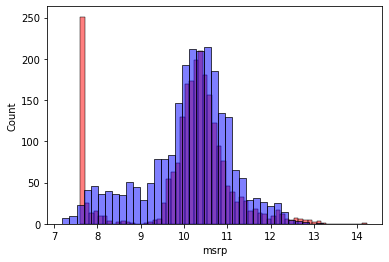

In [60]:
sns.histplot(y_test, color='red', alpha=0.5)
sns.histplot(pred, color='blue', alpha=0.5)

Text(0, 0.5, 'Predicted Price')

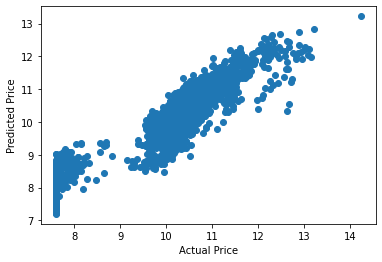

In [61]:
#Lets put the exponent back on the car price
ax = plt.scatter(x=y_test, y=pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [62]:
#r2 score
print(r2_score(y_test, pred))

0.8404066091307689


(array([ 39.,  78., 360., 874., 671., 225., 115.,  18.,   2.,   2.]),
 array([-1.43418062, -1.06415268, -0.69412473, -0.32409679,  0.04593116,
         0.4159591 ,  0.78598705,  1.15601499,  1.52604294,  1.89607088,
         2.26609883]),
 <BarContainer object of 10 artists>)

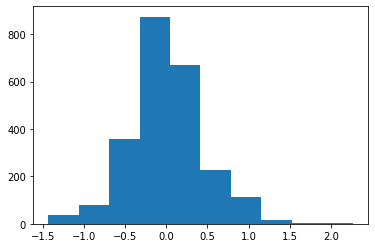

In [63]:
#make sure errors are normally distributed
plt.hist(y_test - pred)